In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sb  
import random
from sklearn import preprocessing

%matplotlib inline

In [2]:
file_path = 'data/gapminder_under5mortality.csv'
child_mortality_df = pd.read_csv(file_path, index_col = 0)
child_mortality_df.index.names = ['country']
child_mortality_df.shape

(440, 216)

In [3]:
child_mortality_df.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,468.58,468.58,468.58,468.58,468.58,468.58,469.98,469.98,469.98,469.98,...,116.3,113.2,110.4,107.6,105.0,102.3,99.5,96.7,93.9,91.1
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,...,19.5,18.7,17.9,17.3,16.6,16.0,15.5,14.9,14.4,14.0
Algeria,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,...,32.1,30.7,29.5,28.4,27.4,26.6,25.8,25.2,24.6,24.0


Clean data, remove countiry with missing or no information.

In [4]:
child_mortality_clean = child_mortality_df.dropna()
#child_mortality_clean = child_mortality_clean.drop(child_mortality_clean.columns[[i for i in range(0,100)]], axis=1)  # df.columns is zero-based pd.Index 


In [5]:
child_mortality_clean.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,468.58,468.58,468.58,468.58,468.58,468.58,469.98,469.98,469.98,469.98,...,116.3,113.2,110.4,107.6,105.0,102.3,99.5,96.7,93.9,91.1
Albania,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,...,19.5,18.7,17.9,17.3,16.6,16.0,15.5,14.9,14.4,14.0
Algeria,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,...,32.1,30.7,29.5,28.4,27.4,26.6,25.8,25.2,24.6,24.0
Angola,485.68,485.68,485.68,485.68,485.68,485.68,485.68,485.68,485.68,485.68,...,200.5,196.4,192.0,187.3,182.5,177.3,172.2,167.1,162.2,156.9
Antigua and Barbuda,473.60,469.77,465.97,462.20,458.47,454.76,451.08,447.43,443.82,440.23,...,11.8,11.3,10.9,10.4,9.9,9.5,9.1,8.7,8.4,8.1


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [7]:
def plot_timeseries_df(df,linewidth=5):
    
    if 'cluster' in df.columns:
        df = df.drop('cluster',axis=1)
    
    df = df.T
    df.index = pd.to_datetime(df.index.values, format='%Y')    
    ax = df.plot(figsize=(16,8), linewidth=linewidth, fontsize=20)
    ax.set_xlabel("Year", fontsize=20)
    ax.set_ylabel("Under 5 child mortality", fontsize=20)
    ax.legend(bbox_to_anchor=(1.1, 1.05))

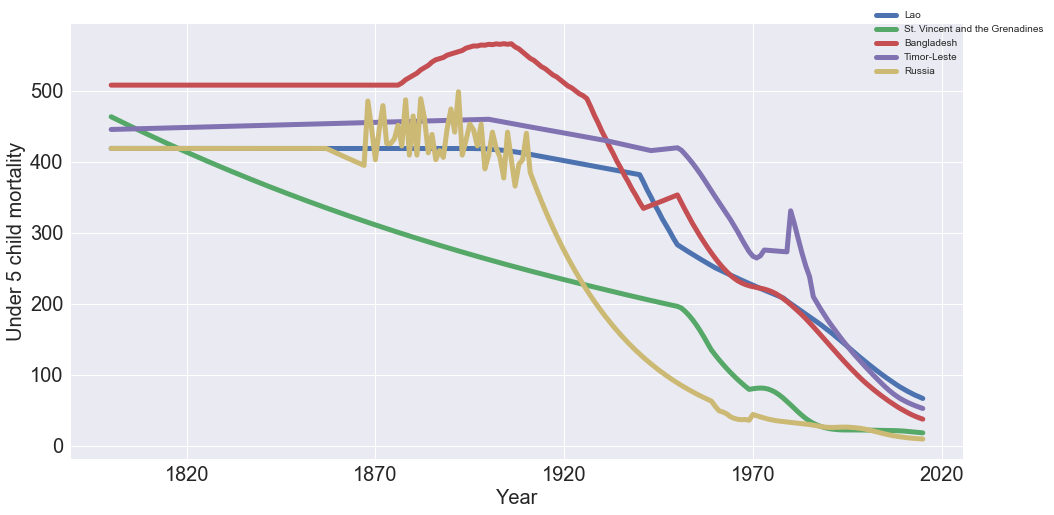

In [8]:
plot_timeseries_df(child_mortality_clean.sample(n=5))

In [9]:
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(child_mortality_clean)
scaled_child_mortality_df = pd.DataFrame(scaled_df, columns =child_mortality_clean.columns, index =child_mortality_clean.index  )

In [10]:
scaled_child_mortality_df.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.670427,0.670427,0.720965,0.728932,0.732634,0.738263,0.695571,0.731171,0.686761,0.707986,...,0.573887,0.570248,0.568938,0.568723,0.497093,0.571429,0.572604,0.573592,0.573658,0.575484
Albania,0.242157,0.242157,0.358366,0.376688,0.385199,0.398142,0.286066,0.369554,0.265404,0.315181,...,0.084008,0.082128,0.080296,0.080087,0.068798,0.078286,0.078777,0.078134,0.077403,0.078065
Algeria,0.632040,0.632040,0.688463,0.697359,0.701492,0.707776,0.653359,0.693895,0.643327,0.667496,...,0.147773,0.144112,0.141574,0.140152,0.121124,0.138857,0.139330,0.140521,0.141074,0.142581
Angola,0.748853,0.748853,0.787365,0.793436,0.796257,0.800546,0.763405,0.791072,0.756557,0.773053,...,1.000000,1.000000,1.000000,1.000000,0.872578,1.000000,1.000000,1.000000,1.000000,1.000000
Antigua and Barbuda,0.693451,0.675885,0.710830,0.704866,0.695018,0.687926,0.613912,0.645135,0.570463,0.584691,...,0.045040,0.043905,0.043317,0.042749,0.036337,0.041143,0.041152,0.040581,0.039950,0.040000


Implementing PCA

In [11]:
from  sklearn.decomposition  import PCA

pca = PCA(n_components=4)
pca.fit(scaled_child_mortality_df)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
child_mortality_4D = pca.transform(child_mortality_clean)
print(pca.explained_variance_ratio_)


[0.7156319  0.15235747 0.04932878 0.03089097]


In [13]:
child_mortality_PC_df = pd.DataFrame(child_mortality_4D)
child_mortality_PC_df.index = scaled_child_mortality_df.index
child_mortality_PC_df.columns = ['PC1','PC2','PC3','PC4']
child_mortality_PC_df.head()

,PC1,PC2,PC3,PC4
country,,,,
Afghanistan,5623.678400,2349.563483,370.784187,-54.758734
Albania,3647.833950,2485.348093,420.251519,221.073210
Algeria,4814.868422,2816.052301,400.497590,-0.358713
Angola,5720.312399,2274.596290,578.727988,207.860646
Antigua and Barbuda,2649.075313,2050.629896,1225.653936,-208.262380


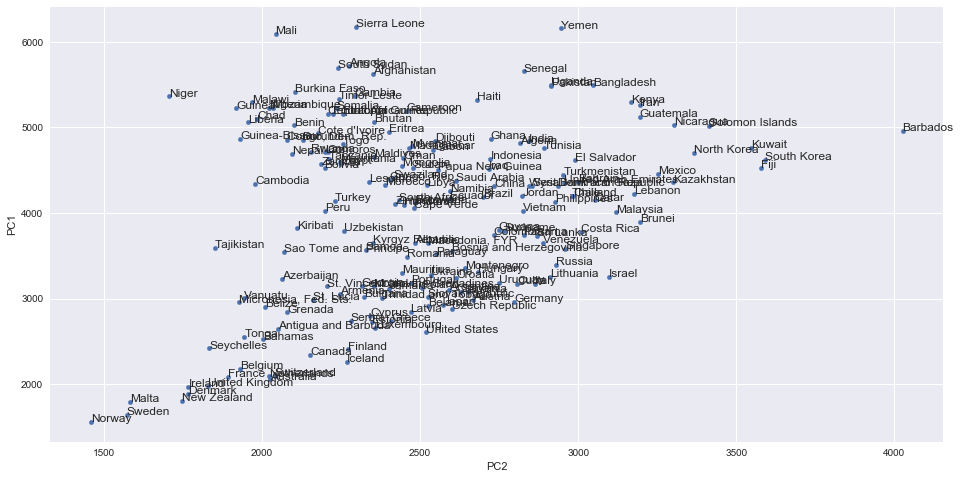

In [14]:
ax = child_mortality_PC_df.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))

for i, country in enumerate(child_mortality_PC_df.index):
    ax.annotate(country, (child_mortality_PC_df.iloc[i].PC2, child_mortality_PC_df.iloc[i].PC1))

In [15]:
scaled_child_mortality_df['country_mean_scaled'] = scaled_child_mortality_df.mean(axis=1)
child_mortality_PC_df['country_mean_scaled'] = pd.Series(scaled_child_mortality_df['country_mean_scaled'], index=scaled_child_mortality_df.index)
child_mortality_PC_df.head()

,PC1,PC2,PC3,PC4,country_mean_scaled
country,,,,,
Afghanistan,5623.678400,2349.563483,370.784187,-54.758734,0.735693
Albania,3647.833950,2485.348093,420.251519,221.073210,0.385736
Algeria,4814.868422,2816.052301,400.497590,-0.358713,0.590964
Angola,5720.312399,2274.596290,578.727988,207.860646,0.780208
Antigua and Barbuda,2649.075313,2050.629896,1225.653936,-208.262380,0.255192


In [16]:
child_mortality_PC_df['country_change'] = pd.Series(child_mortality_clean['1800']-child_mortality_clean['2015'], index=child_mortality_clean.index)
country_change_max = child_mortality_PC_df['country_change'].max()
country_change_min = child_mortality_PC_df['country_change'].min()
country_change_scaled = (child_mortality_PC_df.country_change - country_change_min) / country_change_max
child_mortality_PC_df['country_change_scaled'] = pd.Series(country_change_scaled, index=child_mortality_PC_df.index)
child_mortality_PC_df[['country_change','country_change_scaled']].head()

,country_change,country_change_scaled
country,,
Afghanistan,377.48,0.168827
Albania,361.20,0.136258
Algeria,436.21,0.286320
Angola,328.78,0.071400
Antigua and Barbuda,465.50,0.344917


In [17]:
child_mortality_PC_df['country_change_slope'] = pd.Series((child_mortality_clean['1900']-child_mortality_clean['2000'])/float(2015-1900), index=child_mortality_clean.index)
country_change_max = child_mortality_PC_df['country_change_slope'].max()
country_change_min = child_mortality_PC_df['country_change_slope'].min()
country_change_scaled = (child_mortality_PC_df.country_change_slope - country_change_min) / country_change_max
child_mortality_PC_df['country_change_slope_scaled'] = pd.Series(country_change_scaled, index=child_mortality_PC_df.index)
child_mortality_PC_df[['country_change_slope_scaled','country_change_slope']].head()

,country_change_slope_scaled,country_change_slope
country,,
Afghanistan,0.379062,2.998000
Albania,0.384311,3.027739
Algeria,0.493776,3.647913
Angola,0.261124,2.329826
Antigua and Barbuda,0.148850,1.693739


In [18]:
child_mortality_PC_df['country_max'] = pd.Series(child_mortality_clean['1800'])
country_mean_max = child_mortality_PC_df['country_max'].max()
country_mean_min = child_mortality_PC_df['country_max'].min()
country_mean_scaled = (child_mortality_PC_df.country_max-country_mean_min) / country_mean_max
child_mortality_PC_df['country_max_scaled'] = pd.Series(country_mean_scaled, index=child_mortality_clean.index)
child_mortality_PC_df.head()

,PC1,PC2,PC3,PC4,country_mean_scaled,country_change,country_change_scaled,country_change_slope,country_change_slope_scaled,country_max,country_max_scaled
country,,,,,,,,,,,
Afghanistan,5623.678400,2349.563483,370.784187,-54.758734,0.735693,377.48,0.168827,2.998000,0.379062,468.58,0.270483
Albania,3647.833950,2485.348093,420.251519,221.073210,0.385736,361.20,0.136258,3.027739,0.384311,375.20,0.097698
Algeria,4814.868422,2816.052301,400.497590,-0.358713,0.590964,436.21,0.286320,3.647913,0.493776,460.21,0.254996
Angola,5720.312399,2274.596290,578.727988,207.860646,0.780208,328.78,0.071400,2.329826,0.261124,485.68,0.302124
Antigua and Barbuda,2649.075313,2050.629896,1225.653936,-208.262380,0.255192,465.50,0.344917,1.693739,0.148850,473.60,0.279772


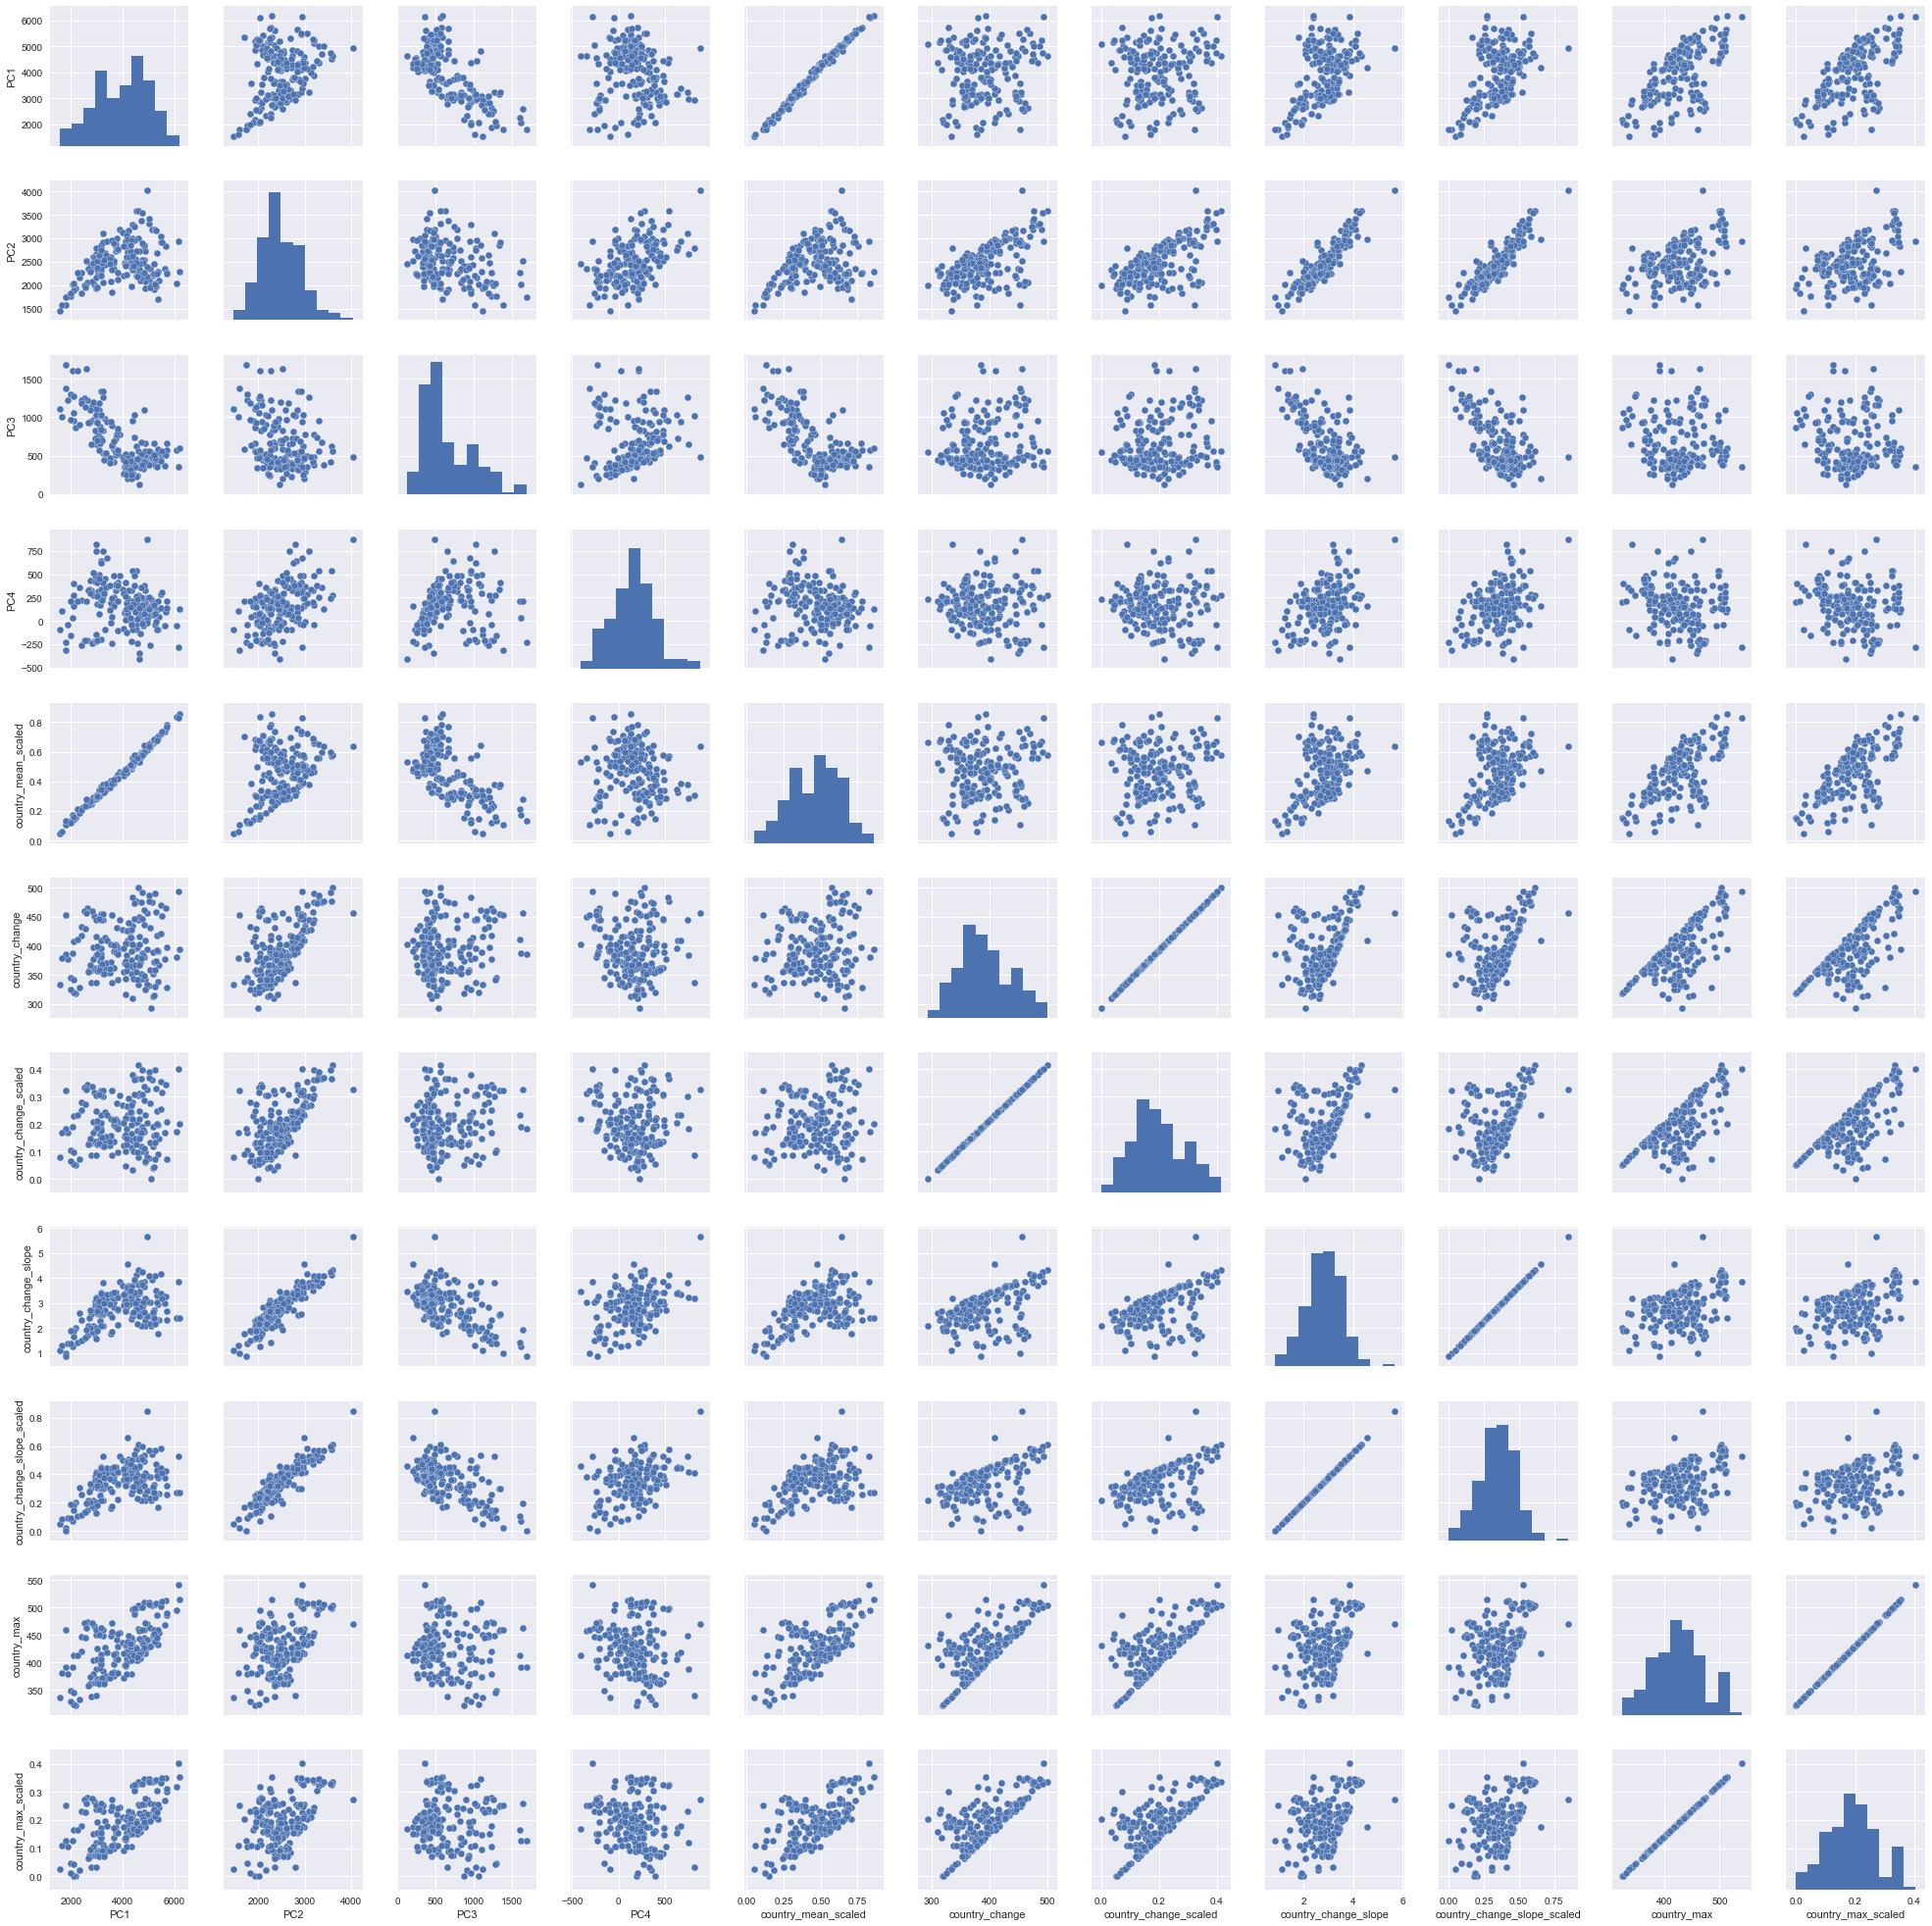

In [ ]:
seaborn.pairplot(child_mortality_PC_df)

In [ ]:
child_mortality_PC_df.plot(kind='scatter', x='PC2', y='PC1', s=child_mortality_PC_df['country_mean_scaled']*100, figsize=(16,8))

In [ ]:
child_mortality_PC_df.plot(kind='scatter', x='PC2', y='PC1', s=child_mortality_PC_df['country_change_slope_scaled']*100, figsize=(16,8))

In [ ]:
from  sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)

clusters = kmeans.fit(child_mortality_PC_df[['PC1','PC2','PC3','PC4']])

In [ ]:
child_mortality_PC_df['cluster'] = pd.Series(clusters.labels_, index=child_mortality_PC_df.index)
child_mortality_clean['cluster'] = pd.Series(clusters.labels_, index=child_mortality_clean.index)

child_mortality_clean.head()

In [ ]:
import numpy as np

ax = child_mortality_PC_df.plot(
    kind='scatter',
    x='PC2',y='PC1',
    c=child_mortality_PC_df.cluster.astype(np.float), 
    figsize=(16,8))
for i, country in enumerate(child_mortality_PC_df.index):
    ax.annotate(country, (child_mortality_PC_df.iloc[i].PC2, child_mortality_PC_df.iloc[i].PC1))

In [ ]:
child_mortality_PC_df_cluster0= child_mortality_clean[child_mortality_clean['cluster']==0]
child_mortality_PC_df_cluster1= child_mortality_clean[child_mortality_clean['cluster']==1]
child_mortality_PC_df_cluster2= child_mortality_clean[child_mortality_clean['cluster']==2]
child_mortality_PC_df_cluster3= child_mortality_clean[child_mortality_clean['cluster']==3]



In [ ]:
child_mortality_clean.head()

In [ ]:
def timeseries_for_clusters_mean(cluster_df):
    
    concat_df = []
    for i in np.unique(cluster_df['cluster']):
        df_cluster= cluster_df[cluster_df['cluster']==i]
        df_cluster.loc['Mean Cluster '+str(i)] = df_cluster.mean() 
        if 'cluster' in df_cluster.columns:
            df_no_cluster = df_cluster.drop(['cluster'], axis=1)
        concat_df.append(pd.DataFrame(df_no_cluster.iloc[-1]))
    
    final_df = pd.concat(concat_df,axis=1)
    
    
    final_df.index = pd.to_datetime(final_df.index.values, format='%Y')    
    ax = final_df.plot(figsize=(16,8), linewidth=5, fontsize=20)
    ax.set_xlabel("Year", fontsize=20)
    ax.set_ylabel("Under 5 child mortality", fontsize=20)
    ax.legend(bbox_to_anchor=(1.1, 1.05))



In [ ]:
plot_timeseries_df(child_mortality_PC_df_cluster0,1)
plot_timeseries_df(child_mortality_PC_df_cluster1,1)
plot_timeseries_df(child_mortality_PC_df_cluster2,1)
plot_timeseries_df(child_mortality_PC_df_cluster3,1)


In [ ]:
timeseries_for_clusters_mean(child_mortality_clean)


#ax = a.plot(figsize=(16,8), linewidth=1, fontsize=20)


Relate this to income:

In [ ]:
file_path = 'data/gapminder_gdp_per_capita.csv'
gdp_per_capita_df = pd.read_csv(file_path, index_col = 0)

gdp_per_capita_df.shape
gdp_per_capita_df.reset_index(level=0, inplace=True)


In [ ]:
gdp_per_capita_df_clean = gdp_per_capita_df.dropna()
gdp_per_capita_df_clean.head()

In [ ]:
gdp_list = []
for i in range(child_mortality_clean.shape[0]):
    
    name =  child_mortality_clean.index[i]
    try:    
        gdp = float(gdp_per_capita_df_clean[gdp_per_capita_df_clean['GDP per capita']==name]['2015'])
    except Exception:
        print name
        gdp = np.nan
    gdp_list.append(gdp)
    
child_mortality_clean['GDP']= gdp_list

In [ ]:
child_mortality_clean = child_mortality_clean.dropna()

child_mortality_clean

In [ ]:
sb.distplot(child_mortality_clean[child_mortality_clean['cluster']==1]['GDP'],kde=False);
sb.distplot(child_mortality_clean[child_mortality_clean['cluster']==0]['GDP'],kde=False);
sb.distplot(child_mortality_clean[child_mortality_clean['cluster']==3]['GDP'],kde=False);
sb.distplot(child_mortality_clean[child_mortality_clean['cluster']==2]['GDP'],kde=False);



In [ ]:
print child_mortality_clean[child_mortality_clean['cluster']==0]['GDP'].mean()
print child_mortality_clean[child_mortality_clean['cluster']==0].index

In [ ]:
print child_mortality_clean[child_mortality_clean['cluster']==1]['GDP'].mean()
print child_mortality_clean[child_mortality_clean['cluster']==1].index

In [ ]:
print child_mortality_clean[child_mortality_clean['cluster']==2]['GDP'].mean()
print child_mortality_clean[child_mortality_clean['cluster']==2].index

In [ ]:
print child_mortality_clean[child_mortality_clean['cluster']==3]['GDP'].mean()
print child_mortality_clean[child_mortality_clean['cluster']==3].index

In [ ]:
gdp_list = []
for i in range(child_mortality_PC_df.shape[0]):
    
    name =  child_mortality_PC_df.index[i]
    try:    
        gdp = float(gdp_per_capita_df_clean[gdp_per_capita_df_clean['GDP per capita']==name]['2015'])
    except Exception:
        print name
        gdp = np.nan
    gdp_list.append(gdp)
    print name, gdp

    
child_mortality_PC_df['GDP']= gdp_list
child_mortality_PC_df = child_mortality_PC_df.dropna()


In [ ]:
from scipy.stats.stats import pearsonr   

print pearsonr(child_mortality_PC_df['PC1'], child_mortality_PC_df['country_mean_scaled'])
print pearsonr(child_mortality_PC_df['PC2'], child_mortality_PC_df['country_mean_scaled'])
print pearsonr(child_mortality_PC_df['PC3'], child_mortality_PC_df['country_mean_scaled'])
print pearsonr(child_mortality_PC_df['PC4'], child_mortality_PC_df['country_mean_scaled'])

print pearsonr(child_mortality_PC_df['PC1'], child_mortality_PC_df['country_change_slope_scaled'])
print pearsonr(child_mortality_PC_df['PC2'], child_mortality_PC_df['country_change_slope_scaled'])
print pearsonr(child_mortality_PC_df['PC3'], child_mortality_PC_df['country_change_slope_scaled'])
print pearsonr(child_mortality_PC_df['PC4'], child_mortality_PC_df['country_change_slope_scaled'])

print pearsonr(child_mortality_PC_df['PC1'], child_mortality_PC_df['GDP'])
print pearsonr(child_mortality_PC_df['PC2'], child_mortality_PC_df['GDP'])
print pearsonr(child_mortality_PC_df['PC3'], child_mortality_PC_df['GDP'])
print pearsonr(child_mortality_PC_df['PC4'], child_mortality_PC_df['GDP'])



In [ ]:
#things to do:
#fig X axis in time series figures
#add a average figure initially
#write down text about analysis, well writen to be ready for the presentation
#improve the figures, make them prettier.